In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/Aritro/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
Baird_ELA = pd.ExcelFile('data/Galileo Baird Data CST (Updated).xlsx')
Baird_Math = pd.ExcelFile('data/Galileo Data Baird Math.xlsx')

Madrigal_ELA = pd.ExcelFile('data/Galileo Madrigal ELA Data CST.xlsx')
Madrigal_Math = pd.ExcelFile('data/Galileo Madrigal Math Data CST.xlsx')

In [3]:
#Scores for Ms. Baird Special Education (ELA):
Baird_ELA_17_18 = Baird_ELA.parse('2017-18')
Baird_ELA_16_17 = Baird_ELA.parse('2016-17')
Baird_ELA_15_16 = Baird_ELA.parse('2015-16')
Baird_ELA_14_15 = Baird_ELA.parse('2014-15')
Baird_ELA_13_14 = Baird_ELA.parse('2013-14')

#Scores for Ms. Baird Special Education (Math):
Baird_Math_17_18 = Baird_Math.parse('2017-18')
Baird_Math_16_17 = Baird_Math.parse('2016-17')
Baird_Math_15_16 = Baird_Math.parse('2015-16')
Baird_Math_14_15 = Baird_Math.parse('2014-15')
Baird_Math_13_14 = Baird_Math.parse('2013-14')

# #Scores for Ms. Madrigal 3rd Grade (ELA):
Madrigal_ELA_17_18 = Madrigal_ELA.parse('2017-18')
Madrigal_ELA_16_17 = Madrigal_ELA.parse('2016-17')
Madrigal_ELA_15_16 = Madrigal_ELA.parse('2015-16')
Madrigal_ELA_14_15 = Madrigal_ELA.parse('2014-15')
Madrigal_ELA_13_14 = Madrigal_ELA.parse('2013-14')
Madrigal_ELA_12_13 = Madrigal_ELA.parse('2012-13')
Madrigal_ELA_11_12 = Madrigal_ELA.parse('2011-12')

# #Scores for Ms. Madrigal 3rd Grade (Math):
Madrigal_Math_17_18 = Madrigal_Math.parse('2017-18')
Madrigal_Math_16_17 = Madrigal_Math.parse('2016-17')
Madrigal_Math_15_16 = Madrigal_Math.parse('2015-16')
Madrigal_Math_14_15 = Madrigal_Math.parse('2014-15')
Madrigal_Math_13_14 = Madrigal_Math.parse('2013-14')
Madrigal_Math_12_13 = Madrigal_Math.parse('2012-13')
Madrigal_Math_11_12 = Madrigal_Math.parse('2011-12')

In [4]:
#Baird Math, dropped columns that did not have test scores
Baird_Math_17_18.drop(Baird_Math_17_18.columns[[6,7,8,9,10,11,12]], axis=1, inplace=True)
Baird_Math_16_17.drop(Baird_Math_16_17.columns[[6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_Math_15_16.drop(Baird_Math_15_16.columns[[6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_Math_14_15.drop(Baird_Math_14_15.columns[[6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_Math_13_14.drop(Baird_Math_13_14.columns[[6,7,8,9,10,11,12,13]], axis=1, inplace=True)

#Baird ELA, dropped columns that did not have test scores
Baird_ELA_17_18.drop(Baird_ELA_17_18.columns[[4,5,6,7,8,9,10]], axis=1, inplace=True)
Baird_ELA_16_17.drop(Baird_ELA_16_17.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_ELA_15_16.drop(Baird_ELA_15_16.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_ELA_14_15.drop(Baird_ELA_14_15.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_ELA_13_14.drop(Baird_ELA_13_14.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)

In [5]:
#Adding year column:
Baird_ELA_13_14['Year'] = '2013-2014'
Baird_ELA_14_15['Year'] = '2014-2015'
Baird_ELA_15_16['Year'] = '2015-2016'
Baird_ELA_16_17['Year'] = '2016-2017'
Baird_ELA_17_18['Year'] = '2017-2018'

Baird_Math_13_14['Year'] = '2013-2014'
Baird_Math_14_15['Year'] = '2014-2015'
Baird_Math_15_16['Year'] = '2015-2016'
Baird_Math_16_17['Year'] = '2016-2017'
Baird_Math_17_18['Year'] = '2017-2018'

Madrigal_ELA_11_12['Year'] = '2011-2012'
Madrigal_ELA_12_13['Year'] = '2012-2013'
Madrigal_ELA_13_14['Year'] = '2013-2014'
Madrigal_ELA_14_15['Year'] = '2014-2015'
Madrigal_ELA_15_16['Year'] = '2015-2016'
Madrigal_ELA_16_17['Year'] = '2016-2017'
Madrigal_ELA_17_18['Year'] = '2017-2018'

Madrigal_Math_11_12['Year'] = '2011-2012'
Madrigal_Math_12_13['Year'] = '2012-2013'
Madrigal_Math_13_14['Year'] = '2013-2014'
Madrigal_Math_14_15['Year'] = '2014-2015'
Madrigal_Math_15_16['Year'] = '2015-2016'
Madrigal_Math_16_17['Year'] = '2016-2017'
Madrigal_Math_17_18['Year'] = '2017-2018'

In [6]:
#Removed NaN values from Baird class
Baird_ELA_13_14.dropna(inplace=True)
Baird_ELA_13_14.drop(Baird_ELA_13_14.tail(3).index,inplace=True)
Baird_ELA_14_15.dropna(inplace=True)
Baird_ELA_14_15.drop(Baird_ELA_14_15.tail(3).index,inplace=True)
Baird_ELA_15_16.dropna(inplace=True)
Baird_ELA_15_16.drop(Baird_ELA_15_16.tail(3).index,inplace=True)
Baird_ELA_16_17.dropna(inplace=True)
Baird_ELA_16_17.drop(Baird_ELA_16_17.tail(3).index,inplace=True)
Baird_ELA_17_18.dropna(inplace=True)
Baird_ELA_17_18.drop(Baird_ELA_17_18.tail(3).index,inplace=True)

Baird_Math_13_14.dropna(inplace=True)
Baird_Math_13_14.drop(Baird_Math_13_14.tail(3).index,inplace=True)
Baird_Math_14_15.dropna(inplace=True)
Baird_Math_14_15.drop(Baird_Math_14_15.tail(3).index,inplace=True)
Baird_Math_15_16.dropna(inplace=True)
Baird_Math_15_16.drop(Baird_Math_15_16.tail(3).index,inplace=True)
Baird_Math_16_17.dropna(inplace=True)
Baird_Math_16_17.drop(Baird_Math_16_17.tail(3).index,inplace=True)
Baird_Math_17_18.dropna(inplace=True)
Baird_Math_17_18.drop(Baird_Math_17_18.tail(3).index,inplace=True)

#Removed NaN values from Madrigal class
Madrigal_ELA_11_12.dropna(inplace=True)
Madrigal_ELA_12_13.dropna(inplace=True)
Madrigal_ELA_13_14.dropna(inplace=True)
Madrigal_ELA_14_15.dropna(inplace=True)
Madrigal_ELA_15_16.dropna(inplace=True)
Madrigal_ELA_16_17.dropna(inplace=True)
Madrigal_ELA_17_18.dropna(inplace=True)

Madrigal_Math_11_12.dropna(inplace=True)
Madrigal_Math_12_13.dropna(inplace=True)
Madrigal_Math_13_14.dropna(inplace=True)
Madrigal_Math_14_15.dropna(inplace=True)
Madrigal_Math_15_16.dropna(inplace=True)
Madrigal_Math_16_17.dropna(inplace=True)
Madrigal_Math_17_18.dropna(inplace=True)

In [7]:
Baird_ELA_17_18

,Name,Pre Score,Pre %,Grade in Academic Year,Year
0,"Barlow, G",6.0,0.150,6th,2017-2018
1,"Garcia, A",6.0,0.150,5th,2017-2018
2,"Gonzalez, A",9.0,0.225,6th,2017-2018
4,"Htoo, L",12.0,0.300,6th,2017-2018
6,"Martinez, C",13.0,0.325,5th,2017-2018
7,"Meza Rosales, G",10.0,0.250,5th,2017-2018
8,"Pena, A",10.0,0.250,6th,2017-2018
9,"Ramirez, E",12.0,0.300,6th,2017-2018
10,"Soto Molina, J",6.0,0.150,6th,2017-2018


In [8]:
Madrigal_ELA_11_12['Post-Pre'] = Madrigal_ELA_11_12['Post Score'] - Madrigal_ELA_11_12['Pre Score']
Madrigal_ELA_12_13['Post-Pre'] = Madrigal_ELA_12_13['Post Score'] - Madrigal_ELA_12_13['Pre Score']
Madrigal_ELA_13_14['Post-Pre'] = Madrigal_ELA_13_14['Post Score'] - Madrigal_ELA_13_14['Pre Score']
Madrigal_ELA_14_15['Post-Pre'] = Madrigal_ELA_14_15['Post Score'] - Madrigal_ELA_14_15['Pre Score']
Madrigal_ELA_15_16['Post-Pre'] = Madrigal_ELA_15_16['Post Score'] - Madrigal_ELA_15_16['Pre Score']
Madrigal_ELA_16_17['Post-Pre'] = Madrigal_ELA_16_17['Post Score'] - Madrigal_ELA_16_17['Pre Score']
Madrigal_ELA_17_18['Post-Pre'] = Madrigal_ELA_17_18['Post Score'] - Madrigal_ELA_17_18['Pre Score']

Madrigal_Math_11_12['Post-Pre'] = Madrigal_Math_11_12['Post Score'] - Madrigal_Math_11_12['Pre Score']
Madrigal_Math_12_13['Post-Pre'] = Madrigal_Math_12_13['Post Score'] - Madrigal_Math_12_13['Pre Score']
Madrigal_Math_13_14['Post-Pre'] = Madrigal_Math_13_14['Post Score'] - Madrigal_Math_13_14['Pre Score']
Madrigal_Math_14_15['Post-Pre'] = Madrigal_Math_14_15['Post Score'] - Madrigal_Math_14_15['Pre Score']
Madrigal_Math_15_16['Post-Pre'] = Madrigal_Math_15_16['Post Score'] - Madrigal_Math_15_16['Pre Score']
Madrigal_Math_16_17['Post-Pre'] = Madrigal_Math_16_17['Post Score'] - Madrigal_Math_16_17['Pre Score']
Madrigal_Math_17_18['Post-Pre'] = Madrigal_Math_17_18['Post Score'] - Madrigal_Math_17_18['Pre Score']

In [9]:
#Combining classroom years:
Baird_ELA_list = [Baird_ELA_13_14, Baird_ELA_14_15, Baird_ELA_15_16, Baird_ELA_16_17, Baird_ELA_16_17, Baird_ELA_17_18]
Baird_Math_list = [Baird_Math_13_14, Baird_Math_14_15, Baird_Math_15_16, Baird_Math_16_17, Baird_Math_16_17, Baird_Math_17_18]
Madrigal_ELA_list = [Madrigal_ELA_11_12, Madrigal_ELA_12_13, Madrigal_ELA_13_14, Madrigal_ELA_14_15, Madrigal_ELA_15_16, Madrigal_ELA_16_17, Madrigal_ELA_17_18]
Madrigal_Math_list = [Madrigal_Math_11_12, Madrigal_Math_12_13, Madrigal_Math_13_14, Madrigal_Math_14_15, Madrigal_Math_15_16, Madrigal_Math_16_17, Madrigal_Math_17_18]

Baird_ELA_Master = pd.concat(Baird_ELA_list)
Baird_Math_Master = pd.concat(Baird_Math_list)
Madrigal_ELA_Master = pd.concat(Madrigal_ELA_list)
Madrigal_Math_Master = pd.concat(Madrigal_Math_list)

In [10]:
print(100. * (Madrigal_ELA_Master['Post-Pre'] >= 0).sum() / len(Madrigal_ELA_Master['Post-Pre'].index))
print(100. * (Madrigal_Math_Master['Post-Pre'] >= 0).sum() / len(Madrigal_Math_Master['Post-Pre'].index))

78.7709497207
71.7514124294


In [21]:
Madrigal_Math_Master['Post-Pre'] = Madrigal_Math_Master['Post-Pre'].astype('float')
Madrigal_Math_Master['Post Score'] = Madrigal_Math_Master['Post Score'].astype('float')

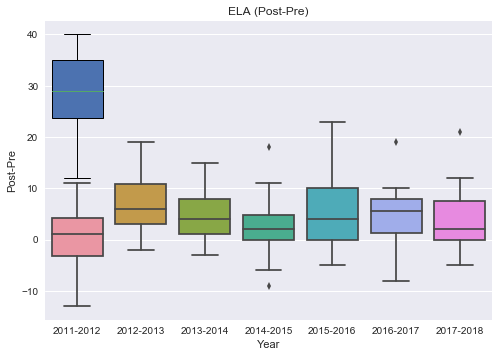

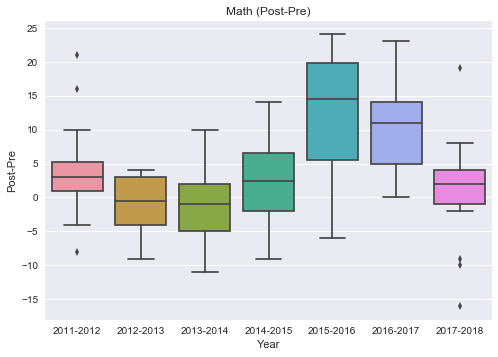

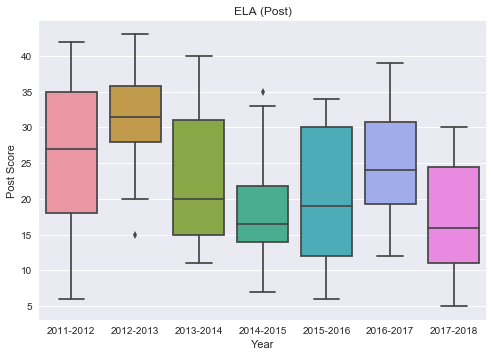

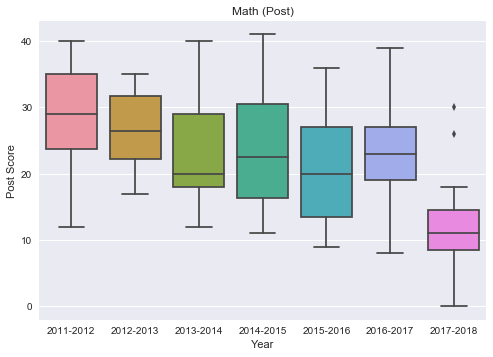

In [22]:
#Box Plots

# Baird:
# sns.boxplot(x='Year' ,y='Post Score', data=Baird_ELA_Master).set_title('Baird ELA')
# plt.show()
# sns.boxplot(x='Year' ,y='Post Score', data=Baird_Math_Master).set_title('Baird Math')
# plt.show()

#Madrigal:
sns.boxplot(x='Year' ,y='Post-Pre', data=Madrigal_ELA_Master).set_title('ELA (Post-Pre)')
plt.show()
sns.boxplot(x='Year' ,y='Post-Pre', data=Madrigal_Math_Master).set_title('Math (Post-Pre)')
plt.show()

sns.boxplot(x='Year' ,y='Post Score', data=Madrigal_ELA_Master).set_title('ELA (Post)')
plt.show()
sns.boxplot(x='Year' ,y='Post Score', data=Madrigal_Math_Master).set_title('Math (Post)')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

x = Madrigal_ELA_Master['Year']
y = Madrigal_ELA_Master['Post-Pre']

mod = ols('y ~ x', data=Madrigal_ELA_Master)
results = mod.fit()
                
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

In [ ]:
w = Madrigal_Math_Master['Year']
z = Madrigal_Math_Master['Post-Pre']

mod2 = ols('z ~ w', data=Madrigal_Math_Master)
results2 = mod2.fit()
                
aov_table2 = sm.stats.anova_lm(results2, typ=2)
print(aov_table2)

In [23]:
import scipy.stats as stats

print('Madrigal ELA t-test:')
for year in Madrigal_ELA_list:
    print(stats.ttest_ind(year['Post-Pre'], 
                          Madrigal_ELA_17_18['Post-Pre']))
    
print('\nMadrigal Math t-test:')
for year2 in Madrigal_Math_list:
    print(stats.ttest_ind(year2['Post-Pre'], 
                          Madrigal_Math_17_18['Post-Pre']))

Madrigal ELA t-test:
Ttest_indResult(statistic=-2.0040242484109227, pvalue=0.05061167633131844)
Ttest_indResult(statistic=1.8197703073243479, pvalue=0.07466558911607162)
Ttest_indResult(statistic=0.792013409155111, pvalue=0.4318184349217422)
Ttest_indResult(statistic=-0.8889151964017188, pvalue=0.3782223068363272)
Ttest_indResult(statistic=0.6462547385018245, pvalue=0.5213257463967824)
Ttest_indResult(statistic=0.5847909338511436, pvalue=0.5612666696070077)
Ttest_indResult(statistic=0.0, pvalue=1.0)

Madrigal Math t-test:
Ttest_indResult(statistic=1.3502099579408693, pvalue=0.1837008474034108)
Ttest_indResult(statistic=-1.0703228051558025, pvalue=0.28993995963173824)
Ttest_indResult(statistic=-1.096756251396934, pvalue=0.2780022109385781)
Ttest_indResult(statistic=0.5668180254736052, pvalue=0.5735349800799059)
Ttest_indResult(statistic=4.891745421646766, pvalue=1.4418728767572552e-05)
Ttest_indResult(statistic=4.967041201129512, pvalue=9.01858129381394e-06)
Ttest_indResult(statistic=0.

In [ ]:
# print(Madrigal_Math_12_13['Post-Pre'].mean)
# print(Madrigal_Math_13_14['Post-Pre'].mean)
# print(Madrigal_Math_14_15['Post-Pre'].mean)
print(Madrigal_Math_15_16['Post-Pre'].mean)
print(Madrigal_Math_16_17['Post-Pre'].mean)
print(Madrigal_Math_17_18['Post-Pre'].mean)